In [10]:
import scipy
import numpy as np


def dilate_mask(
        mask,
        radius
    ):
    reversed_img = mask == 0

    distance, indices = scipy.ndimage.distance_transform_edt(
        reversed_img,
        return_distances=True,
        return_indices=True
    )

    within_radius = distance <= radius
    mask[
        within_radius
    ] = mask[
        indices[0][within_radius],
        indices[1][within_radius]
    ]
    return mask


def dilate_coords(
        spatial_coords,      # [[y, x], [y, x], ...]
        labels,
        radius: int,
        data_type=np.uint16,
    ):
    assert spatial_coords.dtype == 'int'
    assert spatial_coords.shape[0] == labels.shape[0]

    ## prepare blank img frame from spatial coords
    mask = np.zeros(
        shape=spatial_coords.max(axis=0) + 1,
        dtype=data_type
    )
    mask[spatial_coords[:, 0], spatial_coords[:, 1]] = labels
    
    mask = dilate_mask(
        mask,
        radius
    )
    return mask[spatial_coords[:, 0], spatial_coords[:, 1]]

In [ ]:
coords = np.array([
        [0, 0],
        [0, 1],
        [0, 2],
        [1, 0],
        [1, 1],
        [1, 2],
        [2, 0],
        [2, 1],
        [2, 2],
    ])
ori_label = np.array([False, True, False, False, False, True, False, False, False])
res = dilate_coords(coords, ori_label, 1)

In [14]:
from matplotlib import pyplot as plt

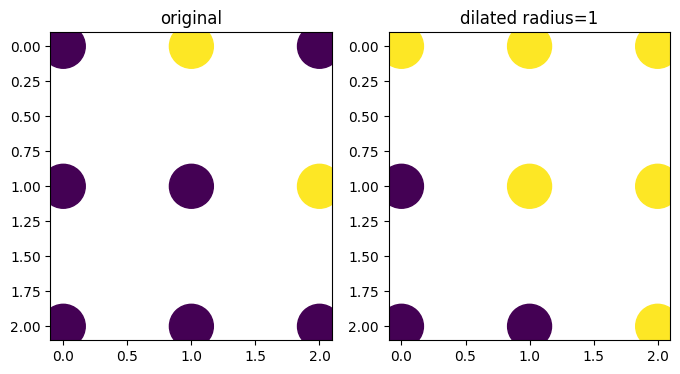

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
ax[0].scatter(
    y = coords[:, 0],
    x = coords[:, 1],
    c = ori_label,
    s=1000,
)
ax[0].set_title('original')
ax[0].invert_yaxis()

ax[1].scatter(
    y = coords[:, 0],
    x = coords[:, 1],
    c = res,
    s=1000,
)
ax[1].set_title('dilated radius=1')
ax[1].invert_yaxis()

plt.show()